 # Machine Learning project

In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 1. Loading and Preprocessing
df = pd.read_csv("CarPrice_Assignment.csv")

In [9]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [11]:
df.head

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [13]:
df.tail

<bound method NDFrame.tail of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [19]:
df.shape

(205, 26)

In [35]:
missing_values = df.isnull().sum()
print(missing_values)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


 #Data Cleaning and Preprocessing

In [48]:
# Handle missing values (if any) 
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True) # Or median, or dropna, etc.


In [95]:
# One-Hot Encode CATEGORICAL features FIRST
categorical_cols = df.select_dtypes(exclude=np.number).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Key change!

# Feature Scaling for NUMERICAL features SECOND
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [97]:
# Convert categorical features to numerical using Label Encoding or One-Hot Encoding
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Or use pd.get_dummies for One-Hot Encoding


In [99]:
# Feature Scaling for numerical features (important for SVR and Gradient Boosting)
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [101]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)  # Assuming 'price' is the target variable
y = df['price']



In [103]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test size as needed

In [111]:
# 2. Model Implementation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'r2': r2, 'mse': mse, 'mae': mae}
  

In [113]:
# 3. Model Evaluation
print("Model Evaluation:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("-" * 20)

Model Evaluation:
Linear Regression:
  r2: -3.187310081900956e+25
  mse: 3.961853985753371e+25
  mae: 3080938811689.398
--------------------
Decision Tree:
  r2: 0.8686457713142739
  mse: 0.16327444179943937
  mae: 0.25369065521628487
--------------------
Random Forest:
  r2: 0.9533052290306544
  mse: 0.05804200398613472
  mae: 0.17418542528735687
--------------------
Gradient Boosting:
  r2: 0.9326100142072609
  mse: 0.08376633491950379
  mae: 0.2067109922891758
--------------------
Support Vector Regression:
  r2: 0.4011703465773214
  mse: 0.7443504360218921
  mae: 0.5519018324004277
--------------------


In [115]:
# Identify the best performing model (example - based on highest R-squared)
best_model = max(results, key=lambda k: results[k]['r2'])
print(f"Best Performing Model: {best_model}")



Best Performing Model: Random Forest



Feature Importance (Random Forest):
                              Feature  Importance
7                          enginesize    0.538823
6                          curbweight    0.295807
14                         highwaympg    0.042438
11                         horsepower    0.036676
0                              car_ID    0.020347
..                                ...         ...
71         CarName_mazda glc custom l    0.000000
131  CarName_toyota corolla 1600 (sw)    0.000000
60        CarName_isuzu D-Max V-Cross    0.000000
148         CarName_volkswagen rabbit    0.000000
119               CarName_subaru baja    0.000000

[190 rows x 2 columns]


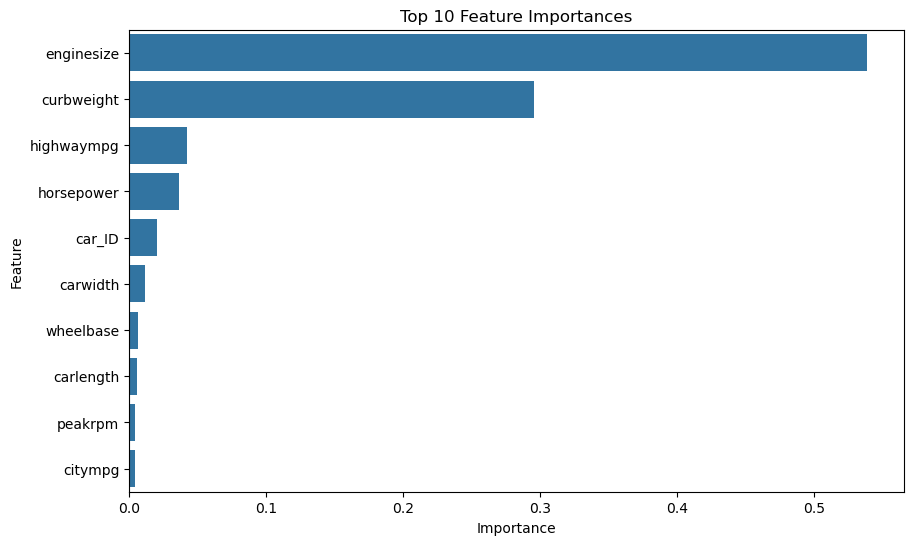

In [117]:
# 4. Feature Importance Analysis (Example using Random Forest - adapt for other models)
best_model_instance = models[best_model] # Get the instance of the best model.
if isinstance(best_model_instance, RandomForestRegressor): # Check if it is a random forest
    feature_importances = best_model_instance.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance (Random Forest):")
    print(feature_importance_df)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10)) # Plot top 10
    plt.title('Top 10 Feature Importances')
    plt.show() # Display the plot
elif hasattr(best_model_instance, 'coef_'):  # Check for linear models
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': best_model_instance.coef_})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance (Linear Model):")
    print(feature_importance_df)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10).abs()) # Plot top 10, absolute values for linear models
    plt.title('Top 10 Feature Importances (Absolute Values)')
    plt.show()
else:
    print("\nFeature importance analysis not directly available for the best model.")



In [119]:
# 5. Hyperparameter Tuning (Example using GridSearchCV with Random Forest)
if isinstance(best_model_instance, RandomForestRegressor):
    param_grid = {  # Example parameter grid - adjust based on the model
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rf_model = grid_search.best_estimator_
    y_pred_tuned = best_rf_model.predict(X_test)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    print(f"\nHyperparameter Tuned Random Forest R-squared: {r2_tuned}")
    print(f"Best parameters: {grid_search.best_params_}")

    # Compare performance after tuning
    print(f"Original Random Forest R-squared: {results['Random Forest']['r2']}")
elif isinstance(best_model_instance, GradientBoostingRegressor): # Example for GradientBoosting
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }
    grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_gb_model = grid_search.best_estimator_
    y_pred_tuned = best_gb_model.predict(X_test)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    print(f"\nHyperparameter Tuned Gradient Boosting R-squared: {r2_tuned}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Original Gradient Boosting R-squared: {results['Gradient Boosting']['r2']}")

else:
    print(f"Hyperparameter tuning not implemented for {best_model}")




Hyperparameter Tuned Random Forest R-squared: 0.9426605298224078
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Original Random Forest R-squared: 0.9533052290306544
